<a href="https://colab.research.google.com/github/ChaibOuss/ML-DL/blob/main/TP3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction aux réseaux de neurones et à PyTorch






Le but de ce tp est de vous guider dans la mise en œuvre d'un perceptron multicouche à l'aide de numpy et vous familiariser avec les concepts de base de PyTorch. Si vous connaissez bien ces sujets, n'hésitez pas à passer à la section des exercices à la fin ou à d'autres modules. Nous nous appuyerons sur des ressources de l'école [Brains, Minds and Machines summer course 2018.](http://cbmm.mit.edu/summer-school/2018)

*  [PyTorch](https://pytorch.org/)

### Implémenter un Perceptron Multi-Couches

### XOr 

Comme vu en cours, le problème du Ou exclusif est iportant pour comprendre la nécessité des couches intermédiaires (cachées). Le but est d'utiliser un réseau de neurones pour prédire la sortie d'une porte logique XOr à partir de deux entrées binaires.

Dans cet exercice, nous relâchons un peu le problème XOr. Au lieu d'entrées binaires, nous considérons des entrées en valeurs réelles. Lorsque les deux valeurs d’entrée ont le même signe, le réseau doit fournir 1; sinon, le réseau devrait afficher 0.

Ci-après à quoi ressemblent les données d'apprentissage dans un tracé 2D. Le point rouge signifie que l'étiquette de sortie est 0, le point bleu signifie que l'étiquette de sortie est 1.

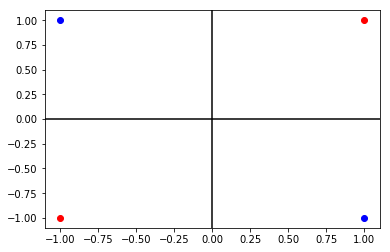

In [ ]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

# input of the MLP
X = np.array([[1,1], [1,-1], [-1,-1], [-1,1]])
# output of the MLP
y = np.array([[0], [1], [0], [1]])

# plot the training data
fig, ax = plt.subplots()
for i in range(y.shape[0]):
  if y[i][0] == 0:
    marker = 'ro'
  else:
    marker = 'bo'
  ax.plot(X[i][0], X[i][1], marker)
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')

Comme discuté dans le cours, les données ne sont pas séparables linéairement, d'où l'intérêt des couches intérmédiaires et des non-linéarités. 

### Implémenter les fonctions d'activation

Plusieurs choix de fonctoins d'activation sont possibles :  sigmoïde, tanh, relu, etc. A titre d'illustratin, nous implémentons dans ce qui suit la  fonction sigmoïde à titre d'exemple. Nous avons aussi besoin de la dérivée de la sigmoïde pour la rétroprogataion.

In [ ]:
# Sigmoid Function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of Sigmoid Function
def derivative_sigmoid(x):
    return x * (1 - x)

### Une architecture PMC simple

Nous concevons un PMC (MLP) simple pour résoudre ce problème. Le PMC comprend une couche cachée et une couche en sortie qui mappe les valeurs en sortie de la couche cachée aux valeurs en sortie.

Nous commençons par initialiser le poids et le biais de chaque couche, ainsi que le nombre d’époques et le taux d’apprentissage (learning rate, step size).

In [ ]:
epoch = 5000 # number of training iterations
learning_rate = 0.1

# dimension of each layer
d_in = X.shape[1] # number of features in the input dataset
d_h = 3   # hidden layer
d_out = 1 # output layer

# weight and bias initialization
wh = np.random.uniform(size=(d_in, d_h))
bh = np.random.uniform(size=(1, d_h))
wout = np.random.uniform(size=(d_h, d_out))
bout = np.random.uniform(size=(1, d_out))

Pour chaque itération, nous exécutons un passage avant (forward pass) pour obtenir la valeur prédite et calculer la perte entre la prédiction et la valeur réelle. Pour simplifier, nous utilisons les différences entre les deux valeurs comme fonction de perte. Ensuite, nous on calcule les gradients et on met à jour les poids et les biais (passe arrière, backpropagation du gradient).

In [ ]:
for i in range(epoch):
    # Forward pass
    h = sigmoid(X.dot(wh) + bh)
    y_pred = sigmoid(h.dot(wout) + bout)
    
    # Compute and print loss
    loss = (y_pred - y).sum()
    if i % 500 == 0:
        print('Epoch', i, ':', loss)

    # Backpropagation to compute gradients
    
    CALULER LES GRADIENTS QUI VOUS SERVIRONT POUR METTRE A JOUR LES POIDS CI DESSOUS

    # Update weights and biases
    wout += grad_wout * learning_rate
    bout += grad_bout * learning_rate
    wh += grad_wh * learning_rate
    bh += grad_bh * learning_rate
    
print('Prediction of training data:')
print(y_pred)

Epoch 0 : 0.7163955667285227
Epoch 500 : 0.03935416942525449
Epoch 1000 : 0.034107619503751296
Epoch 1500 : 0.03841771975195016
Epoch 2000 : 0.030121840777215192
Epoch 2500 : 0.023667150305801327
Epoch 3000 : 0.019727459743708806
Epoch 3500 : 0.017118890597347294
Epoch 4000 : 0.015259654695148561
Epoch 4500 : 0.013860126327340044
Prediction of training data:
[[0.04750884]
 [0.94739145]
 [0.07047163]
 [0.94739303]]


Les valeurs prédites sont très proches des vraies étiquettes . Pour obtenir une sortie binaire, il suffit de définir un seuil sur la sortie pour décider quelle étiquette attribuer.

Numpy offre toutes le fonctions pour implémenter tout type de réseaux de neurones. Cela demande toutefois un certain investissement. Des librairies implémentant des fonctions de haut niveau ont été développées pour faciliter l'implémentatin des réseaux de neurones, dont TensorFlow, PyTorch, Keras, MxNet, Caffe, Theano  qui sont très populaires dans la communauté du Deep Learning. Nous allons nous concentrer ici sur PyTorch.

## Introduction à PyTorch

PyTorch est une bibliothèque open source dédiée au calcul scientifique utilisant des graphes de calcul. Les nœuds dans le graphe représentent des opérations mathématiques, tandis que les arêtes représentent les tableaux de données multidimensionnels (tenseurs).


A l'instar du principe de programmation sous python, il est possible d'ajouter et d'exécuter immédiatement un nœud dans le graphe de calcul. Cette propriété facilite le débogage du code et l'inspection des valeurs dans le réseau.



In [1]:
!pip3 install torch

PyTorch fournit différents modules qui nous intéresent :

*  [ ```torch.nn```](https://pytorch.org/docs/stable/nn.html): Ce module fournit les éléments de base pour la création des réseaux, y compris l'implémentation de différents types de layers. 
*  [```torch.optim```](https://pytorch.org/docs/stable/optim.html): Ce module fournit différents méthodes d'optimisation.

In [2]:
import torch
import torch.nn as nn

### Tenseurs

Les tenseurs sont les feuilles du cgraphe du calcul. Par défaut, un tenseur est initialisé par des valeurs aléatoires. 

On peut appliquer des opérations définies dans   [```torch.Tensor```](https://pytorch.org/docs/stable/tensors.html) sur les tenseurs.

In [ ]:
A = torch.Tensor(5, 3)
B = torch.rand(5, 3)

print(A)
print(B)
print(A + B)
print(torch.add(A, B))

tensor([[4.2200e-36, 0.0000e+00, 3.7835e-44],
        [0.0000e+00,        nan, 0.0000e+00],
        [1.3733e-14, 6.4069e+02, 4.3066e+21],
        [1.1824e+22, 4.3066e+21, 6.3828e+28],
        [3.8016e-39, 2.7477e-06, 0.0000e+00]])
tensor([[3.3195e-01, 5.6297e-01, 1.1614e-01],
        [2.3011e-01, 2.5534e-01, 6.6223e-01],
        [2.2048e-04, 5.7540e-01, 5.5024e-01],
        [7.1060e-01, 7.6698e-01, 6.9546e-01],
        [8.8634e-01, 1.8261e-01, 8.3599e-01]])
tensor([[3.3195e-01, 5.6297e-01, 1.1614e-01],
        [2.3011e-01,        nan, 6.6223e-01],
        [2.2048e-04, 6.4127e+02, 4.3066e+21],
        [1.1824e+22, 4.3066e+21, 6.3828e+28],
        [8.8634e-01, 1.8261e-01, 8.3599e-01]])
tensor([[3.3195e-01, 5.6297e-01, 1.1614e-01],
        [2.3011e-01,        nan, 6.6223e-01],
        [2.2048e-04, 6.4127e+02, 4.3066e+21],
        [1.1824e+22, 4.3066e+21, 6.3828e+28],
        [8.8634e-01, 1.8261e-01, 8.3599e-01]])


### Numpy Bridge

Vous pouvez facilement convertir un tenseur en tableau numpy et inversement. La variable  tenseur définie par Torch et le tableau numpy partageront le même emplacement mémoire. La modification de l'un entraînera la modification de l'autre.

In [ ]:
# convert pytorch tensor to numpy
a = torch.ones(5)
print(a.numpy())
a.numpy()[1] = 2
print(a)

# convert numpy to pytorch tensor
b = np.ones(5)
print(torch.from_numpy(b))

[1. 1. 1. 1. 1.]
tensor([1., 2., 1., 1., 1.])
tensor([1., 1., 1., 1., 1.], dtype=torch.float64)


### Calcul du Gradient par Autograd

PyTorch utilise une technique appelée [différenciation automatique](https://en.wikipedia.org/wiki/Automatic_differentiation) Cette technique est particulièrement efficace lors de la construction de réseaux de neurones, puisqu'elle permet de gagner du temps en calculant le gradient lors de la passe forward.


Une fois le calcul de la passe forward esteffectuée, on appelle la fonction  ```.backward()``` et l'on obtient les gradients automatiquement. On accède au gradient associé à un tenseur par  ```.grad```.

In [ ]:
x = torch.randn(3, requires_grad=True)
print(x)
y = x * 2
print(y)
out = y.mean()

# compute gradients
out.backward()
# print gradients d(out)/dx
print(x.grad.data)

tensor([ 0.7623, -0.8698,  2.0604], requires_grad=True)
tensor([ 1.5245, -1.7397,  4.1208], grad_fn=<MulBackward0>)
tensor([0.6667, 0.6667, 0.6667])


### Utilisation GPU (si vous en avez, et il enfaudra pour le Deep!)

Pour exploiter les GPU, il faudrait déplacer les tenseurs et les couches du réseaux dans la mémoire du GPU. Pour ce faire appelez la fonction ```.cuda()``` ou créez un tenseur dans l'emplacement directement. Si vous avez plusieurs GPU, vous pouvez spécifier quel GPU utiliser  ```cuda:n``` avec n l'identifiant du GPU en question.  

In [ ]:
# move tensor to GPU
if torch.cuda.is_available():
    a = a.cuda()
    print(a)
    x = torch.randn(2, 3, device=torch.device("cuda:0"))
    print(x)

# move back to CPU
a = a.cpu()
print(a)
x = torch.randn(2, 3, device=torch.device("cpu"))
print(x)

tensor([1., 2., 1., 1., 1.], device='cuda:0')
tensor([[-0.2552,  2.0635,  0.5792],
        [ 0.7092, -0.5568,  0.3352]], device='cuda:0')
tensor([1., 2., 1., 1., 1.])
tensor([[ 0.7555, -0.8787, -1.7372],
        [ 0.7786,  1.8609, -0.0780]])


### Régression linéaire avec PyTorch

Maintenant que vous connaissez les rudiements de PyTorch, construisons un modèle de régression simple. 

On génére 100 x, y  points pour l'entrainement. Les données suivent la formule: $y = 3.0 x + 1.0$

Le but est d'apprendre W et b à partir des données d'entrainement. 

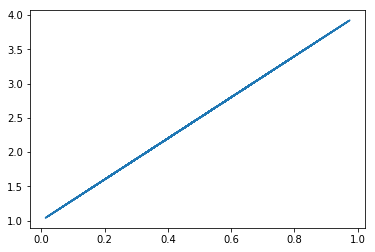

In [ ]:
x_train = np.random.rand(100).astype(np.float32).reshape(-1,1)
y_correct = 3.0 * x_train + 1.0

plt.plot(x_train, y_correct)

Un modèle dans PyTorch est une subclass d ```nn.Module```. Il existe plusieurs "layers" prédéfinis and de conteneurs dans le module  [ ```torch.nn```](https://pytorch.org/docs/stable/nn.html). Ceux-ci peuvent être utilisés pour construire des architectures complexes. 

Les différents "layers" que nous utiliserons sont :

*   [```nn.Linear```](https://pytorch.org/docs/stable/nn.html#torch.nn.Linear): fully connected layer
*   [```nn.Conv2d```](https://pytorch.org/docs/stable/nn.html#torch.nn.Conv2d): convolution layer
* [```nn.MaxPool2d```](https://pytorch.org/docs/stable/nn.html#torch.nn.MaxPool2d): pooling


On peut en construire de nouveaux en combinat ces "layers" avec les classes  ```Sequential``` et ```Concat```. 

La méthode principale à implémenter dans  ```nn.Module``` est ```forward```. Elle calcule la sortie du modèle étant donnée une entrée Tensor. Le calcul que l'on utilise ici définit l'architecture  et comment les données transitent entre couches. 

Un modèle de regeression simple est basiquement un réseau à une seule couche!

On commence par définir les couches dont on a besoin dans ```__init__``` puis nous specifions```forward```.

In [ ]:
class LinearRegressionModel(nn.Module):

    def __init__(self, input_dim, output_dim):

        super(LinearRegressionModel, self).__init__() 
        self.linear = A COMPLETER, UTILISER LA FONCTION nn.Linear de PyTorch

    def forward(self, x):
        out = self.linear(x)
        return out

SyntaxError: ignored

Nous instancions par la suite le modèle pour l'entrainement. Nous utiliserons l'eereur quadratique moyenne ([`nn.MSELoss`](https://pytorch.org/docs/stable/nn.html#torch.nn.MSELoss)) comme fonction de perte à optimiser par descente de gradient stochastique ([`torch.optim.SGD`](https://pytorch.org/docs/stable/optim.html#torch.optim.SGD)).

Nous avons besoin de spécifier les paramètres à optimiser  dans les premiers arguments de la fonction d'optimisation choisie. On met souvent, tous les paramètres du modèle.  

In [ ]:
model = LinearRegressionModel(1, 1)

criterion = nn.MSELoss()
learing_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learing_rate)

epochs = 2000

A l'instart de ce que nous avons fait dans l'exemple avec numpy, à chaque itératino de l'entrainement, nous effectons une passe avant, pour calculer la perte (erreur), on calcul les gradients  (avec ```.backward()```), et on met à jour les paramètres  ```.step()``` en utilisant la fonction d'optimization (optimizer).

**Note** : il est nécessaire de supprimer les gradients qui ont été accumulés lors des itérations précédantes en appelant la fonction  ```optimizer.zero_grad()``` au début de chaque itération.

In [ ]:
for epoch in range(epochs):
    inputs = torch.from_numpy(x_train)
    labels = torch.from_numpy(y_correct)

    optimizer.zero_grad()
    outputs = model.forward(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    if epoch % 100 == 0:
        print('epoch {}, loss {}'.format(epoch, loss.item()))

epoch 0, loss 4.842373371124268
epoch 100, loss 0.44952383637428284
epoch 200, loss 0.3464699685573578
epoch 300, loss 0.2838762700557709
epoch 400, loss 0.2327028512954712
epoch 500, loss 0.19075506925582886
epoch 600, loss 0.15636885166168213
epoch 700, loss 0.12818123400211334
epoch 800, loss 0.10507483035326004
epoch 900, loss 0.08613370358943939
epoch 1000, loss 0.07060690969228745
epoch 1100, loss 0.05787894129753113
epoch 1200, loss 0.04744543507695198
epoch 1300, loss 0.038892749696969986
epoch 1400, loss 0.031881652772426605
epoch 1500, loss 0.02613457478582859
epoch 1600, loss 0.02142350748181343
epoch 1700, loss 0.017561649903655052
epoch 1800, loss 0.014395863749086857
epoch 1900, loss 0.011800785548985004


Une fois le modèle entrainé, on peut appeler la fonction  ```forward``` pour calculer la prédiction pour tout nouveau point.

On peut aussi visualiser tout cela !

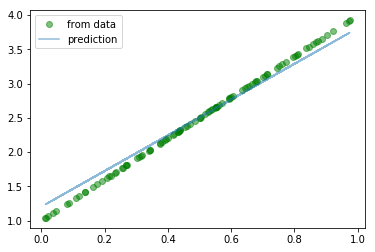

In [ ]:
predicted = model.forward(torch.from_numpy(x_train)).data.numpy()

plt.plot(x_train, y_correct, 'go', label='from data', alpha=0.5)
plt.plot(x_train, predicted, label='prediction', alpha=0.5)
plt.legend()

Dans le cas où il u a eu un problème qte que vous souhaitez inspecter les paramètres appris, on peut utiliser les fonctions suivantes :

In [ ]:
print(model.linear.weight)
print(model.linear.bias)

Parameter containing:
tensor([[2.6077]], requires_grad=True)
Parameter containing:
tensor([1.2022], requires_grad=True)


### Exercice: Revisiter l'example XOr en utilisant PyTorch

Nous considérons à présent des données entre -10 et 10 pour l'entrainement. 


In [ ]:
import random
random.seed(1)

x_train = []
y_correct = []
for i in range(100):
    x0 = random.randint(-10, 10)
    x1 = random.randint(-10, 10)
    label = 0 if x0 * x1 > 0 else 1
    x_train.append([x0, x1])
    y_correct.append(label)
x_train = np.asarray(x_train)
y_correct = np.asarray(y_correct)

Vous devez pour cet exercice implémenter pour modèle. Vous pouvez reprendre la même architecture que dans le début de ce TP qui consiste en un réseau avec une couche cachée. 

Pour appliquer la fonction sigmoid, vous pouvez utiliser [`torch.sigmoid`](https://pytorch.org/docs/stable/torch.html#torch.sigmoid).

In [ ]:
class XorClassifier(nn.Module):

    def __init__(self, input_dim, output_dim):

        super(XorClassifier, self).__init__() 
        
        
        A completer.


    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        return out

Contrairement à ce que nous avions fait auparavant, nous souhaitons ici que la couche de sortie produise deux valeurs indiquant la distribution de probabilité sur les deux étiquettes possibles au lieu d'une valeur réelle par étiquette.

Pour ce faire, nous fixons la dimension de sortie à 2, et utilisons la  cross entropy comme fonction de perte ([`nn.CrossEntropyLoss()`](https://pytorch.org/docs/stable/nn.html#torch.nn.CrossEntropyLoss)) qui est utile quand on fait de la classification à N classes. 

Nous allons aussi utiliser une autre méthode d'optimisation très populaire. [Adam](https://pytorch.org/docs/stable/optim.html#torch.optim.Adam). Vous pouvez comparer les résultats avec un SGD!

In [ ]:
model = XorClassifier(2, 2)

criterion = nn.CrossEntropyLoss()
learning_rate = 0.0005
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

epochs = 5000

Compléter le code ci-après pour entraîner le modèle.

In [ ]:
for epoch in range(epochs):
    inputs = torch.from_numpy(x_train).type(torch.FloatTensor)
    labels = torch.from_numpy(y_correct)
    
    # TODO: please complete the training script
    loss = criterion(model(inputs), labels)
    loss.backward()
    optimizer.step()
    if epoch % 500 == 0:
        print('epoch {}, loss {}'.format(epoch, loss.item()))

epoch 0, loss 0.7153720855712891
epoch 500, loss 0.6749582886695862
epoch 1000, loss 0.6126927733421326
epoch 1500, loss 0.5213003754615784
epoch 2000, loss 0.4378437399864197
epoch 2500, loss 0.37039363384246826
epoch 3000, loss 0.3205169439315796
epoch 3500, loss 0.2740650773048401
epoch 4000, loss 0.26450884342193604
epoch 4500, loss 0.24083729088306427


Puisque nous prédisons la distribution sur les étiquettes, nous devons prendre l'indice de la valeur maximale comme étiquette prédite.

Ensuite, nous pouvons visualiser les prédictions. Si votre modèle apprend bien, vous verrez que la plupart des points des premier et troisième quadrants sont rouges et que les points des deuxième et quatrième quadrants sont bleus.

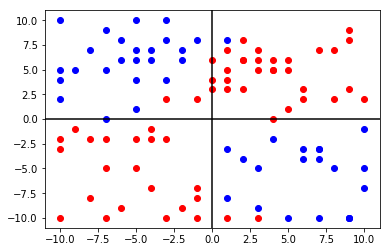

In [ ]:
outputs = model.forward(torch.from_numpy(x_train).type(torch.FloatTensor))
_, predicted = torch.max(outputs, 1)

fig, ax = plt.subplots()
for i in range(y_correct.shape[0]):
    if predicted[i] == 0:
        marker = 'ro'
    else:
        marker = 'bo'
    ax.plot(x_train[i][0], x_train[i][1], marker)
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')

# La vraie vie ou preque : les CNN et la classificatoin d'images



Ce tutoriel vous montrera comment
* Construire, former et tester un réseau de neurones dans[PyTorch](https://pytorch.org/)
* Travailler avec des convolutions
* Visualiser les filtres et autres propriétés comme le réseau pendant l'apprentissage

Pour ce faire, nous allons construire un réseau neuronal convolutionnel dans le but de classer les chiffres manuscrits de la base de données du MNIST.

In [ ]:
# import modules we will use for the tutorial
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

# install and import torch-related modules
!pip3 install torch torchvision

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.optim import lr_scheduler
import torchvision

# detect if a GPU is available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Running on device: {}".format(device))

Running on device: cuda:0


## Configurer TensorBoard

[Tensorboard](https://www.tensorflow.org/guide/summaries_and_tensorboard) est un utilitaire pour enregistrer et visualiser les activations, poids, pertes, etc de votre réseau, pendant et après l'apprentissage. Il simplifie grandement le débogage et le développement itératif de l'architecture du réseau. Il est fortement recommandé.

Pour utiliser TensorBoard dans ce notebook, nous devons surmonter deux obstacles techniques :
 1. nous utiliserons[PyTorch](https://pytorch.org/) pour travailler avec nos réseaux, mais comme son nom l'indique, TensorBoard est conçu pour fonctionner avec[TensorFlow](https://www.tensorflow.org/), un framework concurrent.
 2. il est généralement plus facile d'utiliser TensorBoard lorsque vous travaillez sur votre ordinateur local ou sur un ordinateur sur votre réseau local, mais dans ce tutoriel nous allons exécuter ce notebook sur des machines virtuelles distantes via Colab.

Il n'est pas important que vous compreniez exactement comment nous contournons ces problèmes (ce n'est pas le but du tutoriel !), mais le code est ci-dessous pour votre référence. Nous utiliserons un outil appelé[`tensorboardx`](https://github.com/lanpa/tensorboardX) ([documentation](https://tensorboardx.readthedocs.io/en/latest/?badge=latest)) pour résoudre le problème 1, et un outil appelé `ngrok' pour résoudre le problème 2.

Après avoir lancé la cellule suivante, un lien devrait apparaître, que vous pouvez suivre pour voir votre interface TensorBoard nouvellement créée.


In [ ]:
# download and unzip 'ngrok', the tool we will use to set up the tunnel
ngrok_filename = 'ngrok-stable-linux-amd64.zip'
!if [ ! -f $ngrok_filename ]; then wget https://bin.equinox.io/c/4VmDzA7iaHb/$ngrok_filename && unzip $ngrok_filename; fi

# specify where we will write the logging data files to be read by TensorBoard
LOG_DIR = './runs'

# ensure the selected directory exists
!mkdir -p $LOG_DIR

# start TensorBoard
get_ipython().system_raw(
    'tensorboard --logdir {} --host 0.0.0.0 --port 6006 &'
    .format(LOG_DIR)
)

# open the tunnel with ngrok
get_ipython().system_raw('./ngrok http 6006 &')

# display a link to the TensorBoard URL
! curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print('Public TensorBoard URL: {}'.format(json.load(sys.stdin)['tunnels'][0]['public_url']))"
    
# set up tensorboardx, which we will use to log stuff from pytorch
!pip3 install tensorboardX
from tensorboardX import SummaryWriter

Public TensorBoard URL: https://9f2a388f.ngrok.io


## La base de données MNIST

La base de données MNIST] (https://en.wikipedia.org/wiki/MNIST_database) :
- Elle se compose d'images de chiffres manuscrits de 0 à 9, et de leurs étiquettes ;
- Chaque image est 28px * 28px ;
- L'ensemble de données est divisé en deux sous-ensembles, un sous-ensemble d'"apprentissage" contenant 50000 échantillons et un sous-ensemble de "test" contenant 10000 échantillons.
<p><img src="https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png" alt="MNIST sample images."><br>Sample MNIST images. Image by <a href="//commons.wikimedia.org/w/index.php?title=User:Jost_swd15&amp;action=edit&amp;redlink=1" class="new" title="User:Jost swd15 (page does not exist)">Josef Steppan</a> </p>

Comment charger les images et leurs étiquettes pour former et tester nos modèles ? Comme avec d'autres ensembles de données importants, PyTorch a[une interface pratique](https://pytorch.org/docs/stable/torchvision/datasets.html#) qui simplifie notre vie. Nous voulons utiliser cette interface pour créer des "chargeurs de données" qui nous permettront d'accéder aux données. Nous le ferons en fait deux fois pour l'ensemble de formation, car nous voulons nous assurer que toutes les données que nous utilisons pour apprendre et tester le réseau sont normalisées. Pour cette raison, nous chargerons d'abord les données d'apprentissage, calculerons la moyenne et l'écart-type de tous les pixels de l'ensemble de données et utiliserons ces chiffres pour définir de nouveaux chargeurs de données d'"apprentissage" et de " test " qui normaliseront automatiquement toutes les données à venir.

In [ ]:
# note that PyTorch will automatically download the data from the internet the
# first time we ask it to load it. Hence we have to specify where it should keep
# the data
data_folder = "./data"

# define a data loader that we will only use to compute mean and standard
# deviation on the training set, with the purpose of normalizing all data
trainset_unnormalized = torchvision.datasets.MNIST(root=data_folder, train=True,
                                                  download=True, transform=torchvision.transforms.ToTensor())
unnormalized_loader = torch.utils.data.DataLoader(trainset_unnormalized,
                                                  batch_size=1000)

Avant de continuer, jetons un coup d'oeil à nos données brutes pour voir si elles ressemblent vraiment à des chiffres manuscrits.

True labels for the images below: 5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7


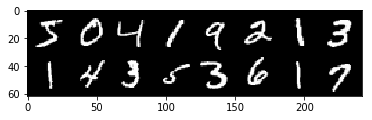

In [ ]:
def imshow(img, ax=None):
  """Plot a PyTorch image using matplotlib"""
  npimg = img.numpy()
  if ax is None:
    fig, ax = plt.subplots()
  npimg = np.transpose(npimg, (1,2,0)) # this is needed as torch uses a (channel, height, width) representation while matplotlib usees (width, height, channel)
  
  npimg = (npimg - npimg.min(axis=(0,1)))/(npimg.max(axis=(0,1))-npimg.min(axis=(0,1))) # map the values to the interval [0,1] for each channel
  ax.imshow(npimg)
  ax.grid(False)

# load one batch of images from the training set
dataiter = iter(unnormalized_loader)
images, labels = dataiter.next()

# it will be useful, in the next cell, to be sure of the size of the images
# (we know MNIST is 28x28 but it's better to make sure). In pytorch, batches of
# data are organized as follows: (batch, channels, height, width), so if we want
# the total number of pixels we have to multiply entries 2 and 3 of the size tuple
# (remember that python uses 0-indexing)
n_pixels = images.size()[2]*images.size()[3]

# only keep the first 16 items of the minibatch for ease of visualization
images = images[:16]
labels = labels[:16]

# print labels
print('True labels for the images below:', ' '.join(('{}'.format(j) for j in labels)))

# show images
imshow(torchvision.utils.make_grid(images))

In [ ]:
# iterate over the training images, keeping a running average of the pixel value
# and their second power. We are performing this iteration in batches of 1000
# images at the time (controlled by the batch_size parameter in the line above).
# Strictly speaking this is unnecessary as the whole dataset can easily fit into
# memory, but we'll do it anyway to show how to iterate over a dataset in
# batches using a data loader.
n_total_images = len(trainset_unnormalized)
train_mean = 0
train_mean_squares = 0
for i, data in enumerate(unnormalized_loader):
  images, labels = data
  train_mean += images.sum()/(n_total_images*n_pixels)
  train_mean_squares += images.pow(2).sum()/(n_total_images*n_pixels)
  
train_std = (train_mean_squares-train_mean.pow(2)).sqrt()

# now that we have the mean and the standard deviation, define the data loaders
# we'll actually use such that the data will be automatically standardized at
# load time.

load_transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor(),
                                                 torchvision.transforms.Normalize((train_mean,), (train_std,))])

trainset = torchvision.datasets.MNIST(root=data_folder, train=True,
                                      download=True, transform=load_transform)
testset =  torchvision.datasets.MNIST(root=data_folder, train=False,
                                      download=True, transform=load_transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=100, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=100, shuffle=False)

## Définir et instancier le réseau

In [ ]:
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    # in PyTorch, we often specify all layers of the network that require hyperparameters
    # by creating them here inside __init__. The connections between layers will
    # be established below, inside the forward() method. Note that the order in
    # which we create them here does not matter, as the connections between them
    # will be specified by the forward() method below.
    self.conv1 = nn.Conv2d(in_channels=1, padding=2, out_channels=32, kernel_size=5) # what is the output size?
    self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2) # what is the output size?
    self.conv2 = nn.Conv2d(in_channels=32, padding=2, out_channels=64, kernel_size=5)# what is the output size?
    self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2) # what is the output size?
    self.fc1 = nn.Linear(in_features=64*7*7, out_features=1024) # where is the value passed as the in_features argument coming from?
    self.fc2 = nn.Linear(in_features=1024, out_features=10)
    self.dropout = nn.Dropout(p=0.5)
    
  def forward(self, x):
    # this method specifies how the network processes its inputs - in other words, it describes the network's connectivity.
    
    # first convolution, followed by ReLU nonlinearity and pooling
    x = self.pool1(F.relu(self.conv1(x)))
    
    # second convolution, followed by ReLU nonlinearity and pooling    
    x = self.pool2(F.relu(self.conv2(x)))
    
    # reshape layer (concatenate all features, removing their "topographic" arrangement)
    x = x.view(-1, 64*7*7)
    
    # first fully connected layer (with ReLU nonlinearity)
    x = F.relu(self.fc1(x))
    
    # dropout (regularization)
    x = self.dropout(x)
    
    # second fully connected layer
    x = self.fc2(x)
    
    # softmax ("squashing nonlinearity") operation. This maps all values to the 
    # [0,1] interval, so that the final output can be interpreted as the 
    # probability of belonging to each of the 10 classes. Note that here, for 
    # easier later processing, we're actually computing the log of the softmax,
    # so the outputs can be interpreted as log-probabilities.
    x = F.log_softmax(x, dim=1)
    
    return x

In [ ]:
# instantiate network
net = Net()

# move network to GPU if available
net.to(device)

Net(
  (conv1): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=3136, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=10, bias=True)
  (dropout): Dropout(p=0.5)
)

## Définir les fonctions utiles pour la visualisation

In [ ]:
def make_filter_image(layer, use_color=True, scale_each=True):
  """Build an image of the weights of the filters in a given convolutional layer."""
  weights = layer.weight.data.to("cpu")
  if not use_color:
    n_input_channels = weights.size()[1]
    weights = weights.view([weights.size()[0], 1, weights.size()[1]*weights.size()[2], weights.size()[3]])
  img = torchvision.utils.make_grid(weights, normalize=True, scale_each=scale_each)
  return img
  
def visualize_filters(layer, use_color=True, scale_each=True):
  """Plot the weights of the filters in a given convolutional layer.
  
    
  If use_color is true (default), the input layer is expected to have either 1 (grayscale)
  or 3(rgb) channels. This is useful for plotting the weights of the first hidden
  layer of the network. If you want to plot the weights of later layer, where the
  number of input channels is arbitrary set use_color to false.
  
  If scale_each is true (default), the values in each filter will be scaled
  independently before plotting; this makes the features of each individual
  filter stand out more. If it's false, the scaling will be done globally
  across all filters; this allows one to compare the filters."""
  
  img = make_filter_image(layer, use_color=use_color, scale_each=scale_each)
  size = 4+max(img.size())/10
  fig, ax = plt.subplots(figsize=(size,size))
  imshow(img, ax)


## Définir la fonction de coût
Pour une fonction de coût, un choix standard pour un problème de classification est L'entropie croisée (Cross Entropy). L'entropie croisée entre deux distributions discrètes $p[i]$ et $q[i]$ est définie comme suit
$$
H(p,q) = -\sum_i p[i]\log(q[i])
$$

Dans un problème de classification, l'indice $i$ ci-dessus ferait référence aux différentes classes auxquelles nous essayons d'affecter nos données. Si nous avons un échantillon dont la vraie classe est la classe $c$, nous disons que la distribution de probabilité réelle sur les classes pour cet échantillon est $p[i]=\delta_{i,c}$, soit $p[i]=1$ si $i=c$ et $p[i]=0$ sinon. La distribution $q$, en revanche, est ce qui provient de notre réseau neuronal : si la dernière couche cachée est $\mathbf{h}$ et que les sorties sont calculées par le softmax,

$$
q[i] = \frac{\exp(h_i)}{\sum_j\exp{h_j}}
$$

Si on branche ces valeurs dans l'expression de l'entropie relative, on obtient
$$
H(p,q) = -\sum_i \delta_i{i,c}\log\left(\frac{\exp(h_i)}{\sum_l\exp(h_l)}\right) = -\log\left(\frac{\exp(h_c)}{\sum_l\exp(h_l) }\right)
$$
On note que la dernière expression correspond à la probabilité logarithmique négative des données sous le modèle défini par le réseau (c'est juste egale à moins le logarithme de la probabilité attribuée par le réseau à la classe correcte). Ainsi, dans PyTorch, pour calculer cette fonction, nous utilisons la classe[negative log likelihood loss] (https://pytorch.org/docs/stable/nn.html?highlight=crossentropy#nllloss). Notez que PyTorch a aussi une classe[CrossEntropyLoss](https://pytorch.org/docs/stable/nn.html?highlight=crossentropy#crossentropyloss) qui combine le softmax et la probabilité de log négatif si vous ne voulez pas les calculer en étapes séparées.

Lors de l'optimisation de notre réseau, nous imposerons également la régularisation L2. Conceptuellement, cela devrait être un terme ajouté à la fonction de coût :
$$
\mathcal{L} = \tilde{\mathcal{L}} + \lambda\frac{1}{2}\|\mathbf{w}\|^2 
$$
où $\tilde{\mathcal{\mathcal{L}}}$ est notre fonction de coût originale, $\|\mathbf{w}\|^2$ est la norme carrée du vecteur poids, et $\lambda$ un hyperparamètre contrôlant la force de la régularisation et devant être défini par validation croisée. Comme il s'agit d'une forme très courante de régularisation, PyTorch offre un raccourci pratique pour l'implémenter, en passant simplement $\lambda$ comme paramètre `weight_decay' à l'optimiseur (voir la définition de l'optimiseur dans la cellule suivante). La raison du nom du paramètre est que, pour chaque poids $w$, le terme de régularisation L2 ajoute au gradient le terme suivant :
$$
-\frac{\partial}{\partial w}\left(\frac{1}{2}\lambda w^2\right) = -\lambda w
$$
ce qui a pour effet de décomposer le poids linéairement vers zéro.

### A part : entropie croisée et divergence Kullback-Leibler
Enfin, une autre observation sur la fonction de cout d'entropie croisée. Notez que l'entropie croisée peut aussi s'écrire comme suit
$$
H(p,q) = H(p) + D_{KL}(p,q) = -\sum_i p[i]\log(p[i]) + \sum_i p_i \log\left(\frac{p[i]}{q[i]} \right)
$$
où $D_{KL}(p,q)$ est la[divergence de Kullback-Leibler](https://en.wikipedia.org/wiki/Kullback%E2%80%93Leibler_divergence) entre $p$ et $q$, et est une mesure de dissimilarité entre deux distributions de probabilités. En général, minimiser $H(p,q)$ par rapport à certains paramètres $\Theta$ quand seulement $q$ dépend de $\Theta$ (comme dans notre cas, puisque nous minimisons par rapport aux paramètres des réseaux, qui affectent seulement la sortie du réseau $q$) équivaut à minimiser $D_{KL}$, et dans ce sens utiliser la perte d'entropie croisée signifie reproduire la vraie distribution de probabilité. Notez que dans le cas particulier de la classification, avec le choix pour $p$ que nous avons fait ci-dessus ($p[i]=\delta_{i,c}$), il est facile de voir que $H(p)=0$, et donc $H(p,q)=D_{KL}(p,q)$.

In [ ]:
# negative log likelihood loss (same as cross entropy in our case)
criterion = nn.NLLLoss()


## Définir un optimiseur

Pour cet exemple, nous utiliserons simplement la descente de gradient stochastique avec momentum. Étant donné une fonction de coût $\mathcal{L}$, la règle de mise à jour pour le poids $w$ est la suivante
$$
\Delta w := -\eta\frac{\partial\mathcal{L}}{\partial w} + \alpha \Delta w
$$
où $\eta$ est le taux d'apprentissage et $\alpha$ est le paramètre momentum.

Jetez un coup d'œil à la[documentation](https://pytorch.org/docs/stable/optim.html#algorithms) de PyTorch pour voir quels autres optimiseurs sont disponibles - n'hésitez pas à expérimenter et voir ce qui se passe !

In [ ]:
optimizer = optim.SGD(net.parameters(), lr=0.1, momentum=0.9) # for the weight_decay parameter, see explanation in the cell above (L2 regularization)

## Train the network

In [ ]:
# number of epochs (iterations over the whole training dataset) we want to train
# the model for. A very small number should be sufficient (1 or 2), but if you 
# are running this on a GPU you can also try increasing it, since it's much faster
# that way.
n_epochs = 2

# set the network in "training mode". This affects the behaviour of the dropout 
# layer by "activating" it.
net.train() 

# initialize logger
writer = SummaryWriter()

plot_iteration = 0
for epoch in range(n_epochs):
  
  running_loss = 0 # we will update this value with a running average of the loss, computed by hand, to print during trainig. Note that the loss can also be seen on TensorBoard, and the plot has a smoothing option.
  for i, data in enumerate(trainloader):
    # get the next minibatch of data
    inputs, labels = data
    
    # move data and labels to GPU if available
    inputs = inputs.to(device)
    labels = labels.to(device)
    
    # zero the gradients (this is needed because PyTorch accumulates gradients 
    # in all parameters every time we call loss.backward())
    optimizer.zero_grad()
    
    # forward propagation of inputs: compute the activation of all units within the network
    outputs = net(inputs)
    
    # compute the loss
    loss = criterion(outputs, labels)
    
    # backpropagation: compute the numerical gradient of the loss with respect to
    # all parameters, evaluated for the current values of the activations and the loss.
    # As mentioned above, these values are stored locally within each parameter.
    loss.backward()
    
    # take a step with the optimizer we have defined above. The optimizer will 
    # go through all the parameters it know about (which we have specified when
    # we created it), and update them according to the gradients it will find there,
    # which we have computed when we performed backpropagation.
    optimizer.step()
    
    # print some statistics
    running_loss += loss.item() # the .item() method casts a pytorch tensor of size 1 to a simple python scalar
    if i % 10 == 0:
      # every ten minibatches, send a picture of the 1st layer filters and the 
      # value of the loss to TensorBoard, which will automatically figure out how to plot them.
      writer.add_image('Layer 1 filters', make_filter_image(net.conv1), plot_iteration)
      writer.add_scalar('Loss', loss.item(), plot_iteration)
      plot_iteration += 1
    if i % 100 == 99:
      # every 100 minibatches, print some information in the cell output.
      print("[epoch {}, iter {}] loss: {:.3f}".format(epoch+1, i+1, running_loss/100))
      running_loss = 0

# close the logger
writer.close()

print("Finished training")

[epoch 1, iter 100] loss: 0.616
[epoch 1, iter 200] loss: 0.195
[epoch 1, iter 300] loss: 0.173
[epoch 1, iter 400] loss: 0.165
[epoch 1, iter 500] loss: 0.139
[epoch 1, iter 600] loss: 0.133
[epoch 2, iter 100] loss: 0.117
[epoch 2, iter 200] loss: 0.110
[epoch 2, iter 300] loss: 0.114
[epoch 2, iter 400] loss: 0.109
[epoch 2, iter 500] loss: 0.089
[epoch 2, iter 600] loss: 0.101
Finished training


## Tester sur les données de test

Ground truth:  7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7 1 2 1 1 7 4 2 3 5 1 2 4 4 6 3 5 5 6 0 4 1 9 5 7 8 9 3 7 4 6 4 3 0 7 0 2 9 1 7 3 2 9 7 7 6 2 7 8 4 7 3 6 1 3 6 9 3 1 4 1 7 6 9
Predicted:     7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7 1 2 1 1 7 4 2 3 5 1 2 4 4 6 3 5 5 6 0 4 1 9 5 7 8 5 3 7 4 6 4 3 0 7 0 2 9 1 7 3 2 9 7 7 6 2 7 8 4 7 3 6 1 3 6 9 3 1 4 1 7 6 9
Accuracy: 99%


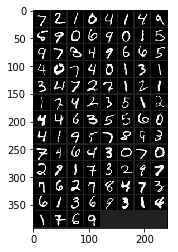

In [ ]:
net.eval() # set the network in evaluation mode (as opposed to training mode; see comment above when we called net.train())

# load a set of example images from the testing set
dataiter = iter(testloader)
images, labels = dataiter.next()

num_examples = images.size()[0]

# plot the examples
imshow(torchvision.utils.make_grid(images))

# move the examples and the labels to the GPU if available (if the network is on the GPU, we have to move any data there before processing it!)
images = images.to(device)
labels = labels.to(device)

# compute predictions and bring them back to the CPU
outputs = net(images)
_, predictions = torch.max(outputs, 1)


#print(' '.join(('{}'.format(j) for j in labels)))
print("Ground truth: ", " ".join("{}".format(labels[j]) for j in range(num_examples)))
print("Predicted:    ", " ".join("{}".format(predictions[j]) for j in range(num_examples)))
print("Accuracy: {}%".format(100*(labels==predictions).sum()/num_examples))

## Visualiser les filtres
Les filtres du réseau formé peuvent être visualisés en utilisant la même fonction que celle utilisée pour générer les images envoyé à TensorBoard pendant l'apprentissage (mais vous êtes encouragés à utiliser TensorBoard et à regarder comment les filtres ont évolué depuis leur état initial !)

En regardant le résultat ci-dessous, voyez-vous une tendance intéressante ?

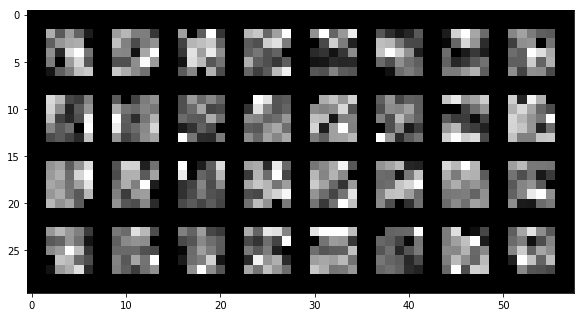

In [ ]:
visualize_filters(net.conv1)

# Exercice

Essayez maintenant d'implémenter un réseau convolutif qui effectue la classification des images sur[CIFAR10] (https://www.cs.toronto.edu/~kriz/cifar.html). CIFAR10 est une base de données d'images utilisé pour la reconnaissance d'objets. Il s'agit d'un sous-ensemble de l'ensemble de données[80 millions de minuscules images] (http://people.csail.mit.edu/torralba/tinyimages/) et se compose de 60 000 images couleur 32x32 contenant une des 10 classes d'objets, avec 6 000 images par classe. Les classes d'objets sont les suivantes :


0. Avion
1. Automobile
2. Oiseau
3. Chat
4. Cerf
5. Chien
6. Grenouille
7. Cheval
8. Navire
9. Camion



Comme MNIST, CIFAR est accessible[directement depuis PyTorch](https://pytorch.org/docs/stable/torchvision/datasets.html#cifar) ; l'interface du chargeur de données devrait être très similaire. Vous pouvez commencer par implémenter une architecture comme celle que nous avons utilisée pour MNIST, et en la formant de la même manière. **Notez que l'entrée est en couleur RVB, et a une taille différente de MNIST (CIFAR est 3x32x32 alors que MNIST est 1x28x28), donc vous devrez probablement commencer par ajuster votre architecture pour y faire face**. Après l'avoir fait fonctionner, vous pouvez essayer de le modifier pour voir ce qui se passe si vous ajoutez, supprimez ou modifiez la taille des filtres, ajoutez ou supprimez des calques, etc.